## Import functions and define universal values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0,'./code')
import eigencurves_prefit


lcName='Put_Name_Here'
planetparams={}
planetparams['t0']=2955934.2922330229#units of days
planetparams['per']=0.813474061208349 #units of days
planetparams['a_abs']=0.01504 #units of AU
planetparams['inc']=82.282623113461 #units of degrees
planetparams['ecc']=0.0 #unitless
planetparams['w']=90. #units of degrees
planetparams['rprs']=0.157334359496779 #unitless ratio
planetparams['ars']=4.88289717045905 #unitless ratio

#for if using a phase curve (since the transit will need to be removed)
planetparams['T14']= 3.7526/24   #units of days

#Change to True if using a phase curve
phasecurve = False

looking for spidermanrc file at /Users/briandavenport/.spidermanrc
no spidermanrc file detected


## Load in data and set up data dictionary

[1.0033685  1.00251781 1.00324441 ... 1.00043514 1.00012316 1.00031194]
[1.0033685  1.00251781 1.00324441 ... 1.00043514 1.00012316 1.00031194]
[1.00074205 1.00074108 1.00074011 ... 1.00000001 1.00000001 1.00000001]
[1.0026245  1.00177542 1.00250244 ... 1.00043514 1.00012316 1.00031193]
[1.0033685  1.00251781 1.00324441 ... 1.00043514 1.00012316 1.00031194]


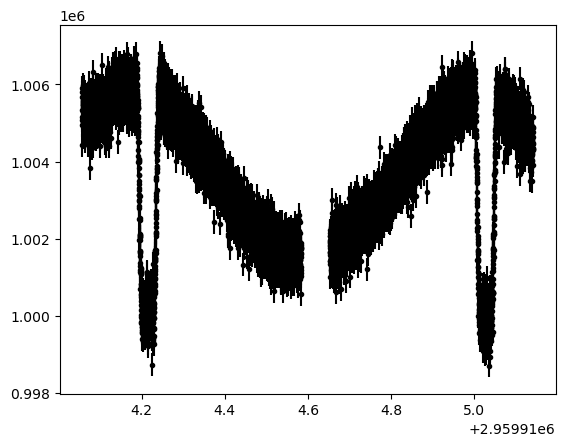

In [4]:
homedir='HOMEDIR'

#Edit this block to account for the filetype and headers being used.
file=np.load(homedir+'FILEPATH')
time=file['time']
waves=file['wavelength']
err=file['error']

#Ensure flux is in ppm, where mid-ecplipse at 1e6
flux=file['flux']



#If this is a phase curve observation, remove transit, as that is not accounted for in models
if phasecurve == True:
    start = planetparams['t0'] - planetparams['T14']/2 - .01
    end = planetparams['t0'] + planetparams['T14']/2 + .01
    rows = []
    for i in range(len(time)):
        if time[i]>=start and time[i]<=end:
            rows.append(i)

    flux = np.delete(flux, rows)
    err = np.delete(err, rows)
    time = np.delete(time, rows)



extent=np.zeros(2)
extent[0]=(np.min(time)-planetparams['t0'])/planetparams['per']*2.*np.pi-np.pi/2.-np.pi #minimum observed point, in radians
extent[1]=(np.max(time)-planetparams['t0'])/planetparams['per']*2.*np.pi+np.pi/2.-np.pi #maximum observed point, in radians


plt.figure()
plt.errorbar(time,flux,yerr=err,color='k',marker='.',linestyle='none')
plt.show()
datadict={'time (days)':time, 'wavelength (um)': waves, 'flux (ppm)': flux, 'flux err (ppm)': err}

## Perform eigencurve fitting at each wavelength

Fitting wavelength=7.75


Fitting for degree=3, nparams=2


/Users/briandavenport/eigenspectra/./code/eigencurves_prefit.py:100: ComplexWarning: Casting complex values to real discards the imaginary part
  sphericalcoeffs[i] += fcoeffs.T[j,2*i-1]-fcoeffs.T[j,2*(i-1)]


Negative flux check: (False, 0.00028226173555409275)
Delta best fit params from last fit: 1.2417410421172672
BIC: -86928.21283853822
Negative flux check: (False, 0.0002822589779128718)
Delta best fit params from last fit: 0.0001394613421847395
BIC: -86930.21283853822
[ 1.20048624e-03  9.99197377e-01 -3.35509959e-05 -4.13663269e-04]


/Users/briandavenport/eigenspectra/./code/eigencurves_prefit.py:335: ComplexWarning: Casting complex values to real discards the imaginary part
  spheresbest[i] += fcoeffbest.T[j,2*i-1]-fcoeffbest.T[j,2*(i-1)]


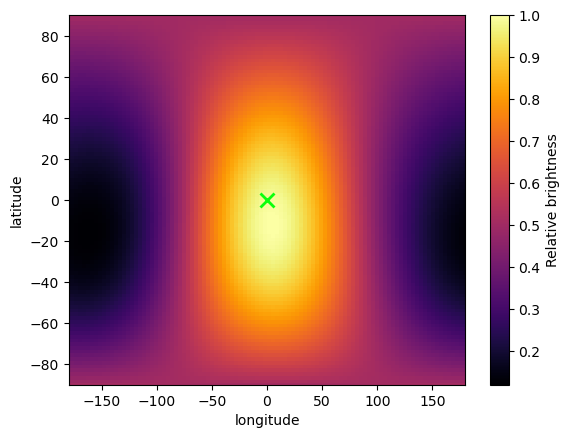

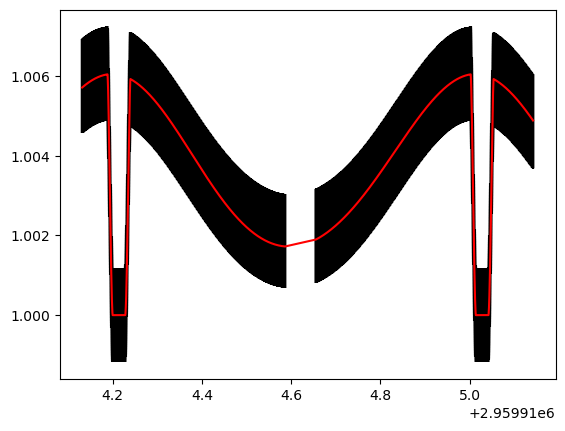



Fitting for degree=3, nparams=3
Negative flux check: (False, 0.0003019185539499423)
Delta best fit params from last fit: 1.2417426323690681
BIC: -87198.2432966528
Negative flux check: (False, 0.0003019185539499423)
Delta best fit params from last fit: 0.0
BIC: -87198.2432966528
[ 1.20081216e-03  9.99196117e-01 -3.35471275e-05 -4.13663072e-04
  1.53118196e-05]


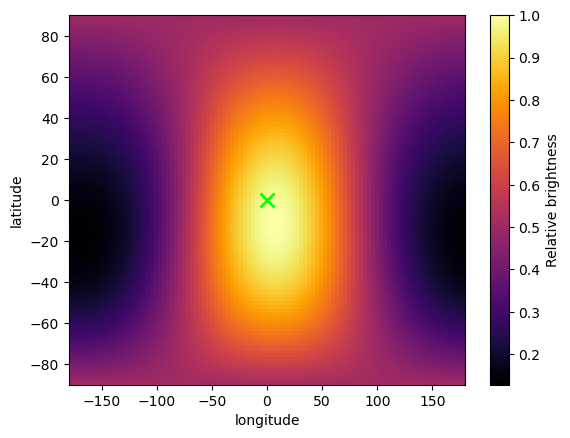

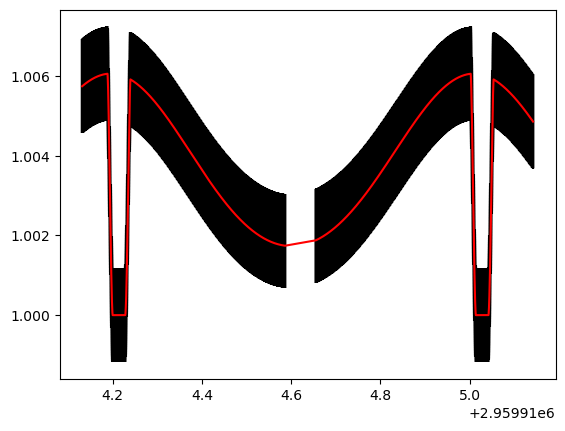



Fitting for degree=3, nparams=4
Negative flux check: (False, 9.356660605335402e-12)
Delta best fit params from last fit: 1.0
BIC: -72860.27375476738
Negative flux check: (False, 5.616144110889909e-14)
Delta best fit params from last fit: 8.006727331138155
BIC: -76477.27375476738
Negative flux check: (False, 0.00034398678925188754)
Delta best fit params from last fit: 53.73278183237247
BIC: -87308.27375476738
Negative flux check: (False, 0.00033231192278826194)
Delta best fit params from last fit: 0.8059565985316477
BIC: -86983.27375476738
Negative flux check: (False, 0.0003323392998082583)
Delta best fit params from last fit: 0.0005052548378884951
BIC: -86981.27375476738
[ 1.20153683e-03  9.99193319e-01 -3.35427841e-05 -4.13657345e-04
  1.53207936e-05 -1.18077159e-05]


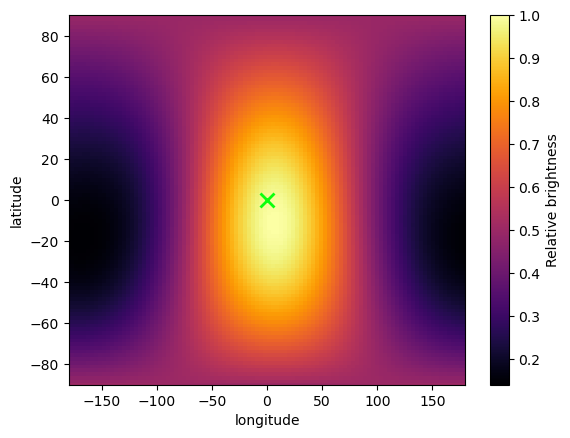

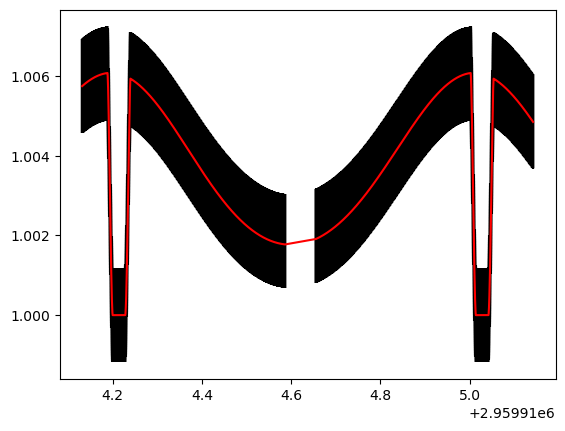



Fitting for degree=3, nparams=5
Negative flux check: (False, 4.633392584771188e-09)
Delta best fit params from last fit: 1.0
BIC: -73178.30421288197
Negative flux check: (False, 2.1593662766847207e-12)
Delta best fit params from last fit: 9.410456626406944
BIC: -79807.30421288197
Negative flux check: (False, 1.8503611562498288e-06)
Delta best fit params from last fit: 8.124569888368054
BIC: -87708.30421288197
Negative flux check: (False, 2.1319517448284968e-08)
Delta best fit params from last fit: 2.591031399080931
BIC: -87716.30421288197
Negative flux check: (False, 3.2664725304178697e-13)
Delta best fit params from last fit: 0.2912912027808835
BIC: -87079.30421288197
Negative flux check: (False, 1.4032971347200589e-13)
Delta best fit params from last fit: 0.22723354150899414
BIC: -87749.30421288197
Negative flux check: (False, 0.00011936260266091424)
Delta best fit params from last fit: 14.316497213492635
BIC: -87509.30421288197
Negative flux check: (False, 1.1806433258906696e-11)


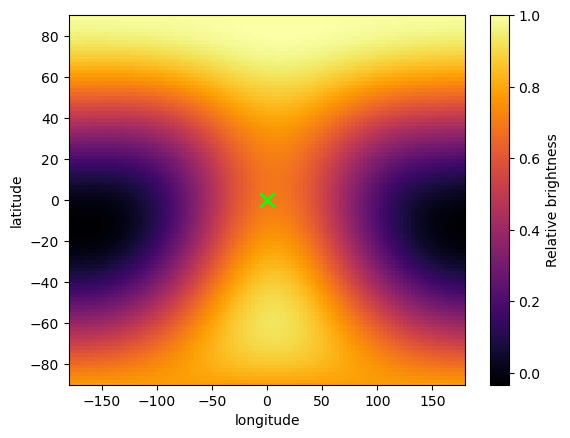

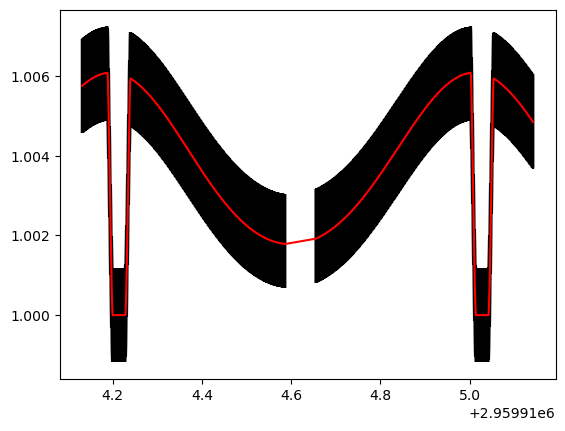



Fitting for degree=3, nparams=6
Negative flux check: (False, 7.200608374120053e-08)
Delta best fit params from last fit: 2.793642992561993
BIC: -80503.33467099654
Negative flux check: (False, 4.273042915565882e-09)
Delta best fit params from last fit: 0.856967099126556
BIC: -87409.33467099654
Negative flux check: (False, 2.8844750657166e-05)
Delta best fit params from last fit: 1.862619123767512
BIC: -87206.33467099654
Negative flux check: (False, 2.55714086906397e-11)
Delta best fit params from last fit: 5.906949794186734
BIC: -87633.33467099654
Negative flux check: (False, 1.833544248942188e-12)
Delta best fit params from last fit: 0.6907137139873497
BIC: -87142.33467099654
Negative flux check: (False, 7.309360629399017e-08)
Delta best fit params from last fit: 0.6497261482249254
BIC: -87764.33467099654
Negative flux check: (False, 2.505168201816439e-13)
Delta best fit params from last fit: 0.18331752826419764
BIC: -88235.33467099654
Negative flux check: (False, 1.3879409395635603e

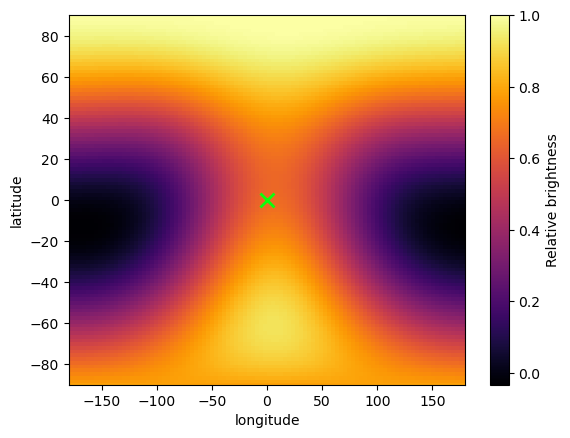

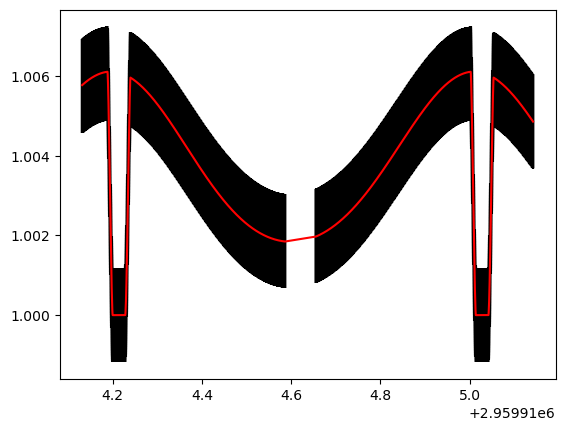



Fitting for degree=4, nparams=2


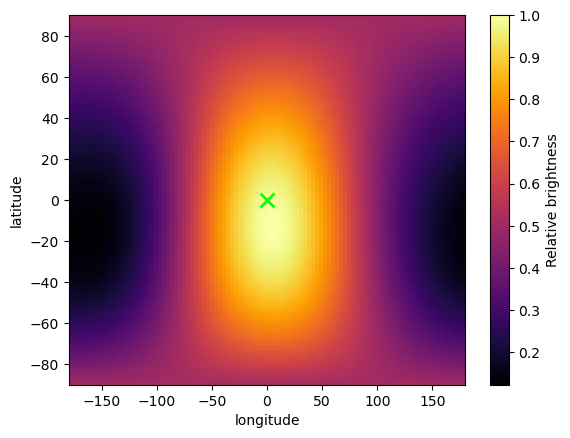

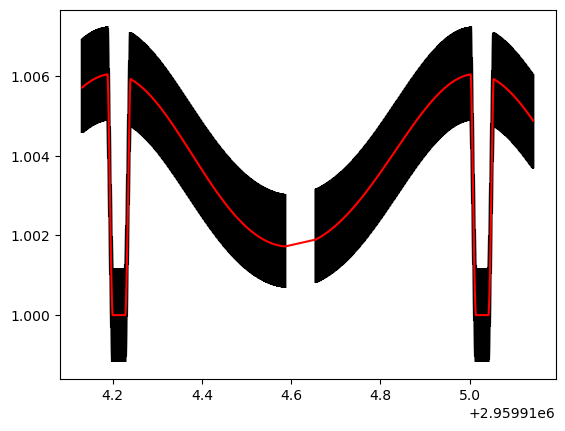



Fitting for degree=4, nparams=3
Negative flux check: (False, 7.149387191346751e-13)
Delta best fit params from last fit: 1.0
BIC: -83503.2432966528
Negative flux check: (False, 0.0003196946230321541)
Delta best fit params from last fit: 1.724512551938405
BIC: -87231.2432966528
Negative flux check: (False, 0.0003196946230321541)
Delta best fit params from last fit: 0.0
BIC: -87231.2432966528
[ 1.20112896e-03  9.99194897e-01  3.36486105e-05  4.13360549e-04
 -1.52856155e-05]


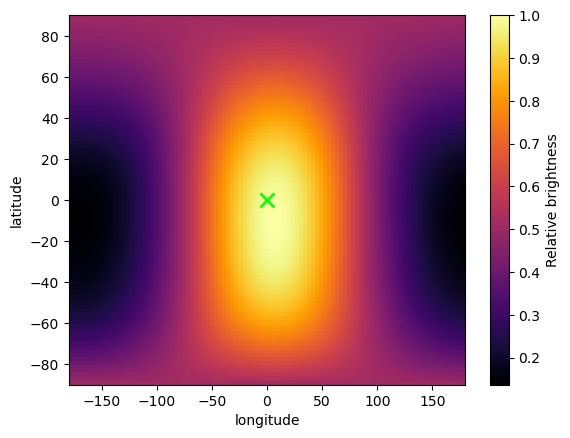

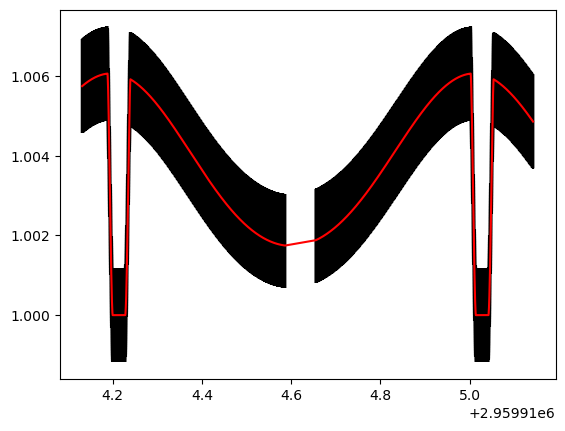



Fitting for degree=5, nparams=4
Negative flux check: (False, 0.000348884957477428)
Delta best fit params from last fit: 1.0
BIC: -87020.27375476738
Negative flux check: (False, 0.00034896145491682693)
Delta best fit params from last fit: 0.0008409285184945315
BIC: -87029.27375476738
[ 1.20177527e-03  9.99192402e-01  3.36450958e-05  4.13351645e-04
 -1.52923125e-05  1.09767930e-05]


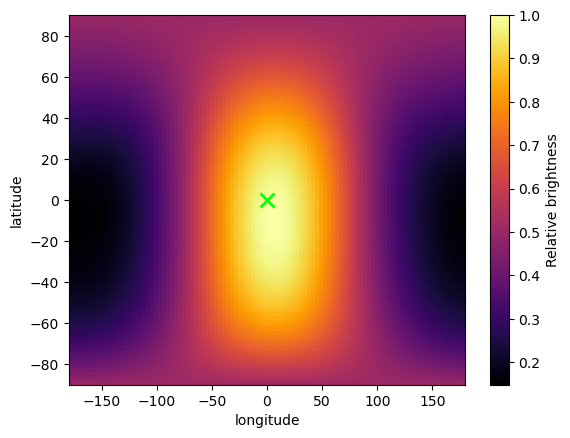

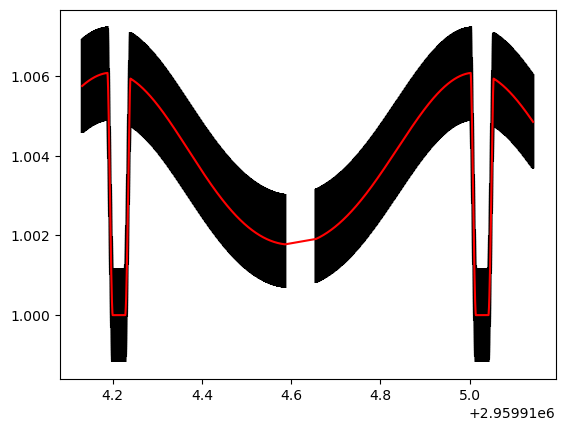



Fitting for degree=5, nparams=5
Negative flux check: (False, 5.8907252589390334e-08)
Delta best fit params from last fit: 1.0
BIC: -87926.30421288197
Negative flux check: (False, 1.6256027990740696e-13)
Delta best fit params from last fit: 10.476781240271391
BIC: -87943.30421288197
Negative flux check: (False, 3.793907788215209e-11)
Delta best fit params from last fit: 0.7063517731499334
BIC: -87414.30421288197
Negative flux check: (False, 2.3382089094476716e-11)
Delta best fit params from last fit: 0.0011984859009033341
BIC: -87414.30421288197
[ 1.09776392e-03  9.99595225e-01  3.41969335e-05  4.13924604e-04
  2.70257441e-05  8.42716623e-06 -2.36484838e-04]


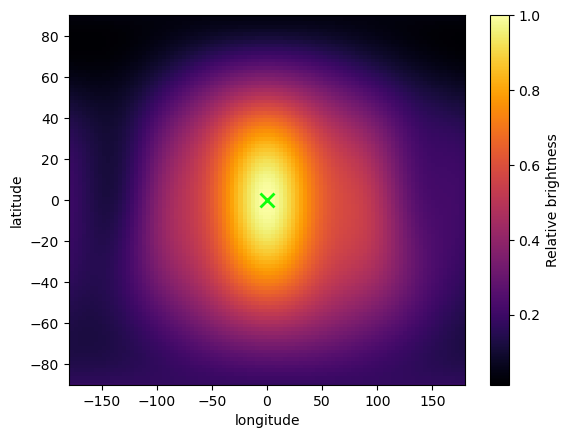

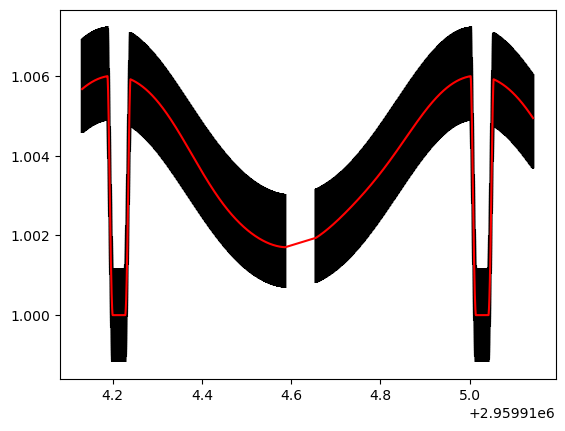



Fitting for degree=5, nparams=6
Negative flux check: (False, 1.3697706093934304e-12)
Delta best fit params from last fit: 1.0
BIC: -80371.33467099654
Negative flux check: (False, 0.00022848786222726074)
Delta best fit params from last fit: 18.451878518152405
BIC: -87891.33467099654
Negative flux check: (False, 0.00020400979481811367)
Delta best fit params from last fit: 47.02325421643792
BIC: -87318.33467099654
Negative flux check: (False, 0.00020411286043533176)
Delta best fit params from last fit: 0.02203195576458527
BIC: -87322.33467099654
Negative flux check: (False, 0.00020411286043533176)
Delta best fit params from last fit: 0.0
BIC: -87322.33467099654
[ 1.29127281e-03  9.98845759e-01  3.31872827e-05  4.12277792e-04
 -1.58633978e-05  1.32862633e-05  2.03092655e-04  2.45940998e-06]


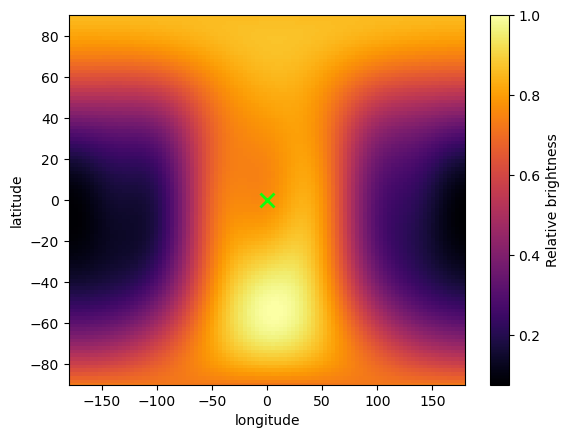

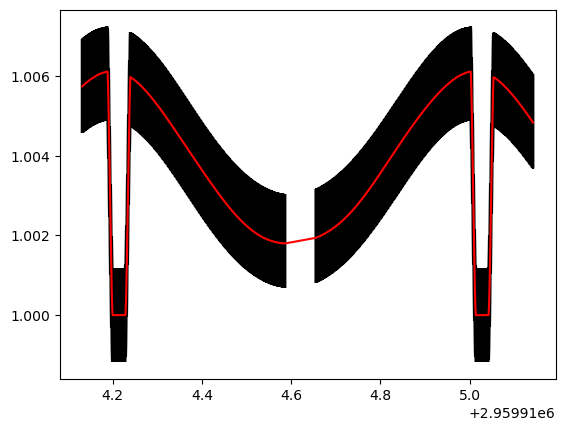



Fitting for degree=6, nparams=2
Negative flux check: (False, 0.0003003142769114849)
Delta best fit params from last fit: 1.0
BIC: -86910.21283853822
Negative flux check: (False, 0.0003002891825300519)
Delta best fit params from last fit: 6.034474851370399e-05
BIC: -86909.21283853822
[1.20079648e-03 9.99196178e-01 3.36598184e-05 4.13356328e-04]


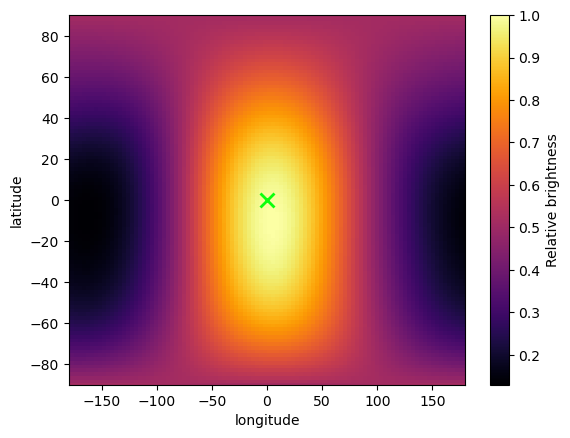

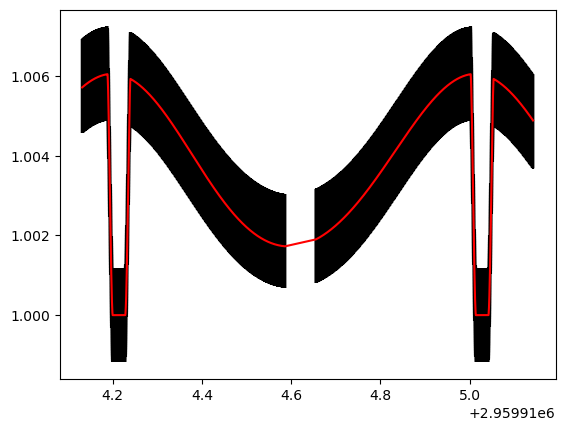



Fitting for degree=6, nparams=3
Negative flux check: (False, 0.00014591217154528343)
Delta best fit params from last fit: 1.0
BIC: -87478.2432966528
Negative flux check: (False, 0.0003192051368938318)
Delta best fit params from last fit: 0.11518345028920109
BIC: -87230.2432966528
Negative flux check: (False, 0.0003192051368938318)
Delta best fit params from last fit: 0.0
BIC: -87230.2432966528
[ 1.20113899e-03  9.99194864e-01  3.36506462e-05  4.13354109e-04
 -1.52934470e-05]


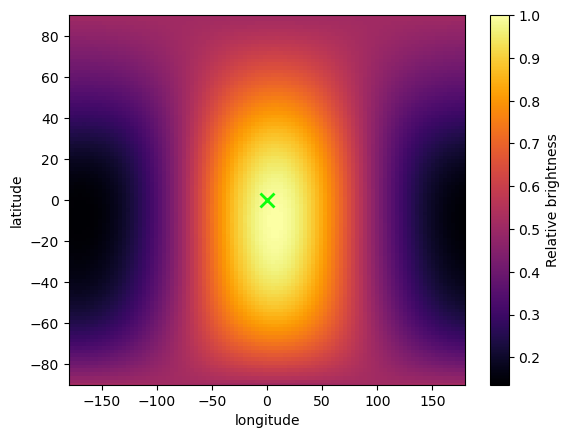

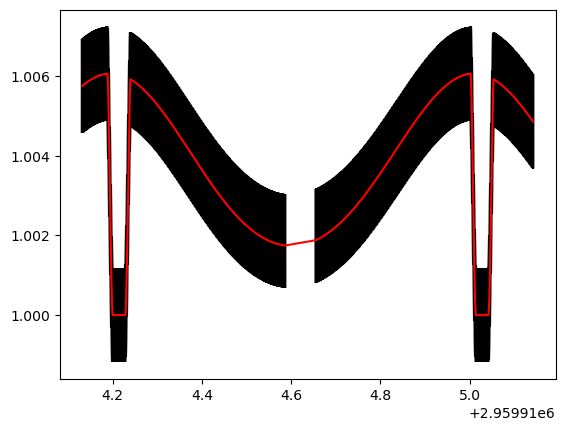



Fitting for degree=6, nparams=4
Negative flux check: (False, 2.2665898801588283e-08)
Delta best fit params from last fit: 1.0
BIC: -88594.27375476738
Negative flux check: (False, 0.00026426839588575767)
Delta best fit params from last fit: 3.4104012482090154
BIC: -87400.27375476738
Negative flux check: (False, 0.00034675254223352645)
Delta best fit params from last fit: 2.801431375696133
BIC: -87027.27375476738
Negative flux check: (False, 0.00034675254223352645)
Delta best fit params from last fit: 0.0
BIC: -87027.27375476738
[ 1.20177415e-03  9.99192399e-01  3.36473204e-05  4.13347162e-04
 -1.52900935e-05  1.09672490e-05]


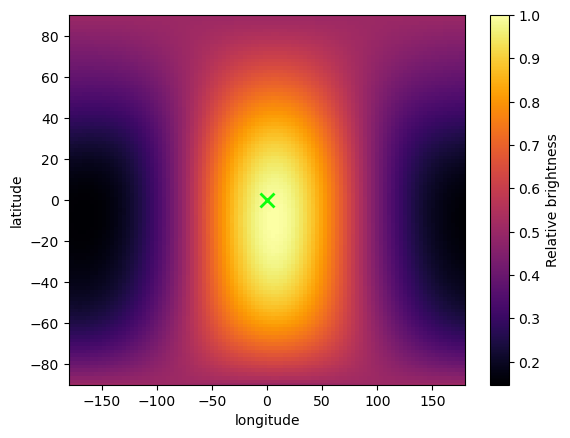

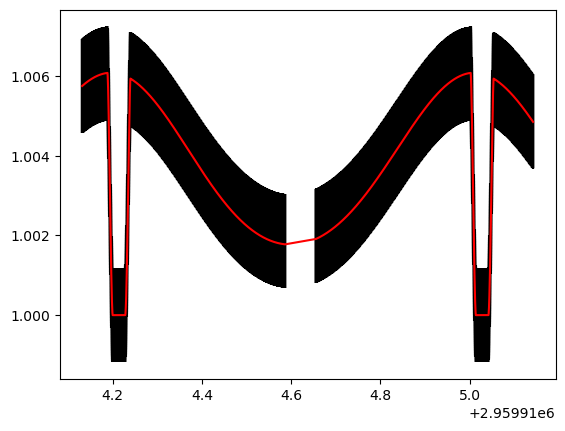



Fitting for degree=6, nparams=5
Negative flux check: (False, 4.1919262074004386e-08)
Delta best fit params from last fit: 1.0
BIC: -88077.30421288197
Negative flux check: (False, 9.127316336560177e-16)
Delta best fit params from last fit: 7.384177132747338
BIC: -87667.30421288197
Negative flux check: (False, 9.534517859061992e-13)
Delta best fit params from last fit: 0.007944070032903712
BIC: -87660.30421288197
[ 1.15834068e-03  9.99360647e-01  3.40690192e-05  3.83299121e-04
  8.32487662e-05  1.81726201e-05 -2.57205130e-04]


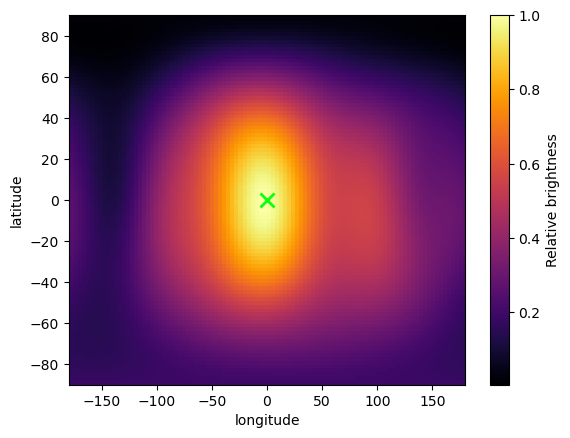

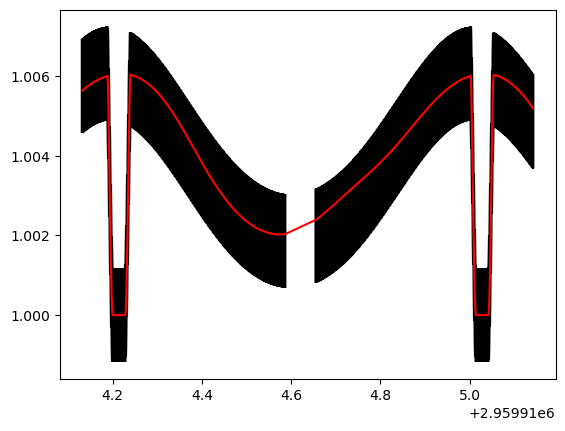



Fitting for degree=6, nparams=6
Negative flux check: (False, 5.781572520195383e-07)
Delta best fit params from last fit: 1.0
BIC: -82918.33467099654
Negative flux check: (False, 3.994722074597353e-12)
Delta best fit params from last fit: 4.228326884317244
BIC: -87801.33467099654
Negative flux check: (False, 2.8213320440626764e-13)
Delta best fit params from last fit: 1.591319990495218
BIC: -87094.33467099654
Negative flux check: (False, 1.2943971995582535e-12)
Delta best fit params from last fit: 0.03705619746873053
BIC: -86926.33467099654
Negative flux check: (False, 4.1592829985894774e-14)
Delta best fit params from last fit: 3.1466001830579775
BIC: -88678.33467099654
Negative flux check: (False, 1.1413613112661422e-07)
Delta best fit params from last fit: 4.487423992993223
BIC: -87889.33467099654
Negative flux check: (False, 4.631719473986564e-12)
Delta best fit params from last fit: 0.21974349689671985
BIC: -86820.33467099654
Negative flux check: (False, 1.590380062707787e-12)
De

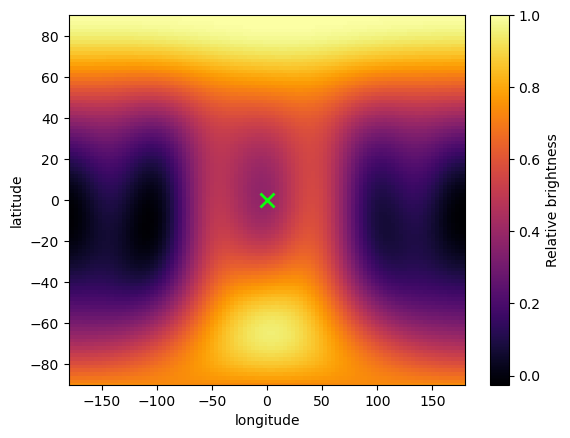

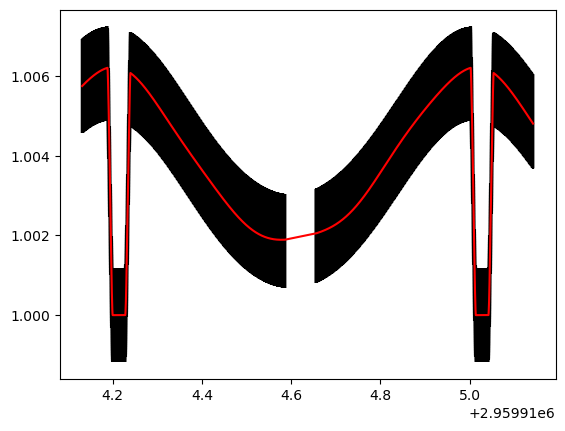

Best degree=6; Best num eigencurves=6


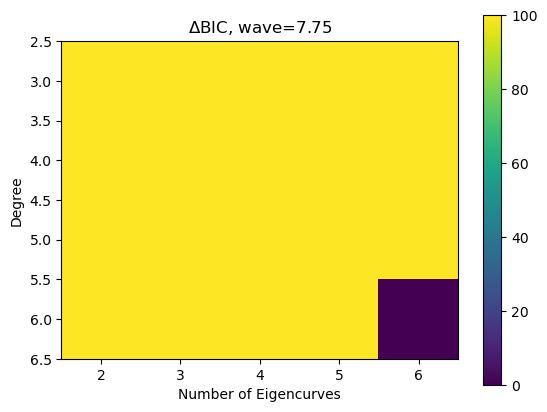

In [4]:
ordmin=3
ordmax=6
eigenmin=2
eigenmax=6
BICdict=eigencurves_prefit.eigencurves(datadict,planetparams,homedir,ordmin,ordmax,eigenmin,eigenmax,\
                            lcName=lcName,plot=True,strict=False,nonegs=True,verbose=True)
